# 시각화 

#### https://pyimagesearch.com/2021/03/01/adversarial-attacks-with-fgsm-fast-gradient-sign-method/

## original model 시각화

C:\Users\user\AppData\Local\Temp\ipykernel_21588\1288666827.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(x='Model', y='Accuracy', data=df, palette=palette)
C:\Users\user\AppData\Local\Temp\ipykernel_21588\1288666827.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(x='Model', y='Loss', data=df, palette=palette)


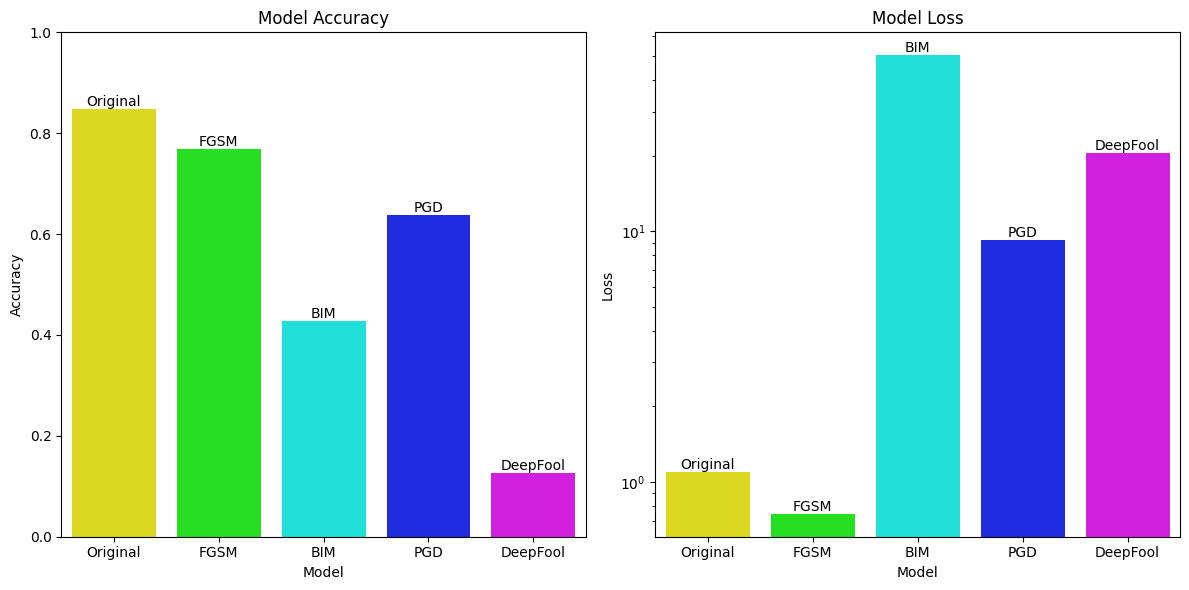

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 데이터 준비
data = {
    'Model': ['Original', 'FGSM', 'BIM',  'PGD', 'DeepFool'],
    'Accuracy': [
        0.847769021987915,  # Original
        0.7690288424491882,  # FGSM
        0.4278215169906616,  # BIM
        0.6377952694892883,  # PGD
        0.12598425149917603  # DeepFool
    ],
    'Loss': [
        1.0981699228286743,  # Original
        0.7454068064689636,  # FGSM
        50.35498046875,  # BIM
        9.197137832641602,  # PGD
        20.58628273010254  # DeepFool
    ]
}

# DataFrame 생성
df = pd.DataFrame(data)

# 색상 팔레트 설정
palette = sns.color_palette("hsv", 5)  # 'hsv' 팔레트에서 5가지 색상을 선택

# 그래프 크기 설정 및 그래프 생성
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
ax1 = sns.barplot(x='Model', y='Accuracy', data=df, palette=palette)
plt.title('Model Accuracy')
plt.ylim(0, 1)
# 범례 추가
for i in range(len(df['Model'])):
    ax1.bar_label(ax1.containers[i], labels=[df['Model'][i]])

# Loss plot
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
ax2 = sns.barplot(x='Model', y='Loss', data=df, palette=palette)
plt.title('Model Loss')
plt.yscale('log')  # Setting scale to log due to large range of loss values
# 범례 추가
for i in range(len(df['Model'])):
    ax2.bar_label(ax2.containers[i], labels=[df['Model'][i]])

# Show plot
plt.tight_layout()
plt.show()


## upgrade model 시각화

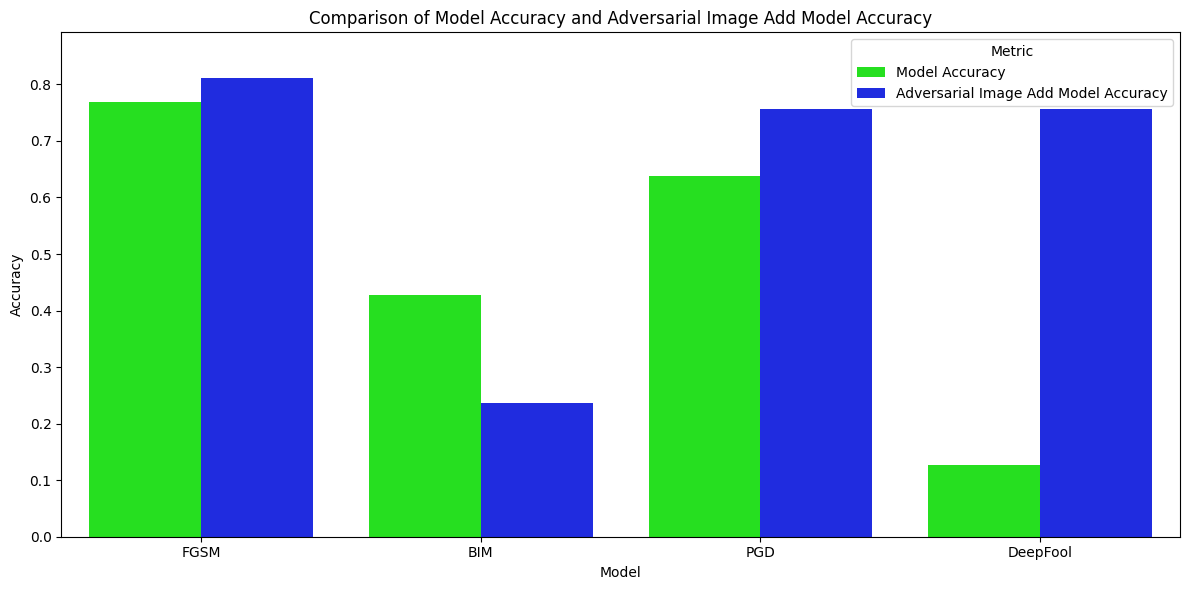

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 데이터 준비
data = {
    'Model': ['FGSM', 'BIM', 'PGD', 'DeepFool'],
    'Model Accuracy': [
        0.7690288424491882,  # FGSM
        0.4278215169906616,  # BIM
        0.6377952694892883,  # PGD
        0.12598425149917603  # DeepFool
    ],
    'Adversarial Image Add Model Accuracy': [
        0.8110235929489136,  # FGSM
        0.23622047901153564,  # BIM
        0.7559055089950562,  # PGD
        0.7559055089950562  # DeepFool
    ]
}

# DataFrame 생성
df = pd.DataFrame(data)

# 데이터 프레임 재구성: long format으로 변경
df_long = df.melt(id_vars=['Model'], var_name='Metric', value_name='Value')

# 색상 팔레트 설정
palette = sns.color_palette("hsv", 2)  # 두 가지 색상 선택

# 그래프 생성
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Model', y='Value', hue='Metric', data=df_long, palette=palette)
plt.title('Comparison of Model Accuracy and Adversarial Image Add Model Accuracy')
plt.ylabel('Accuracy')
plt.ylim(0, max(df['Adversarial Image Add Model Accuracy']) * 1.1)  # y축 범위 조정

# # 각 막대 그룹의 중심에 선 그리기
# num_models = len(data['Model'])
# index = range(num_models)
# offset = 0.2  # 막대 너비에 따른 위치 조정

# for i in index:
#     original_acc = df_long[(df_long['Model'] == data['Model'][i]) & (df_long['Metric'] == 'Model Accuracy')]['Value'].values[0]
#     adv_acc = df_long[(df_long['Model'] == data['Model'][i]) & (df_long['Metric'] == 'Adversarial Image Add Model Accuracy')]['Value'].values[0]
#     plt.plot([i - offset, i + offset], [original_acc, adv_acc], color='black')  # 선 그리기

# 범례 추가
plt.legend(title='Metric')

# 그래프 표시
plt.tight_layout()
plt.show()
